Work in Progress. Will be updated by Friday. Zheyu Ni

This file cleans the Airbnb data. 
1. deleted $ sign and comma in price.
2. visualize price distribution base on different features
3. Price range (0, 800) covers 95\% of the listings
4. create a dummy for the listing without review data
5. check how many listings have hotel/motel in name and agree with their room_type

The remaing data file contains \% of the raw data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../listings_mar7_2023.csv')


In [4]:
df.head(5)

#columns that are interesting:
# latitude
# longitude
# room_type
# property_type
# accommodates
# bathrooms_text
# number_of_reviews
# first_review
# last_revies
# reviews_per_month


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [147]:
#column_names =[df.columns,df.dtypes]
#list(column_names)

df.price[0:10]

0    115
1    176
2     74
3    155
4     50
5     55
6     70
7    130
8     79
9     45
Name: price, dtype: int64

In [148]:
#frequency of different room type
print(df['room_type'].value_counts())


Entire home/apt    20261
Private room       10046
Shared room         1072
Hotel room           157
Name: room_type, dtype: int64


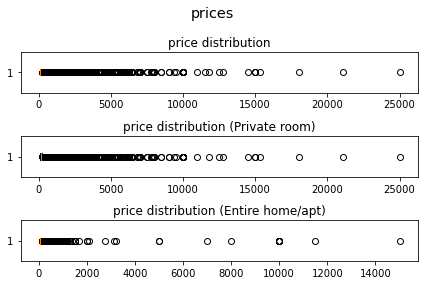

In [149]:

fig =plt.figure()
st=fig.suptitle("prices", fontsize="x-large")
# price distribution
ax1=fig.add_subplot(311)
ax1.boxplot(df.price,vert =0)
ax1.set_title("price distribution")

ax2=fig.add_subplot(312)
#  'room_type' price distribution
ax2.boxplot(df[df['room_type']!='Private room'].price,vert =0)

ax2.set_title("price distribution (Private room)")
fig.tight_layout()

ax3=fig.add_subplot(313)
#  'room_type' price distribution
ax3.boxplot(df[df['room_type']!='Entire home/apt'].price,vert =0)

ax3.set_title("price distribution (Entire home/apt)")
fig.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

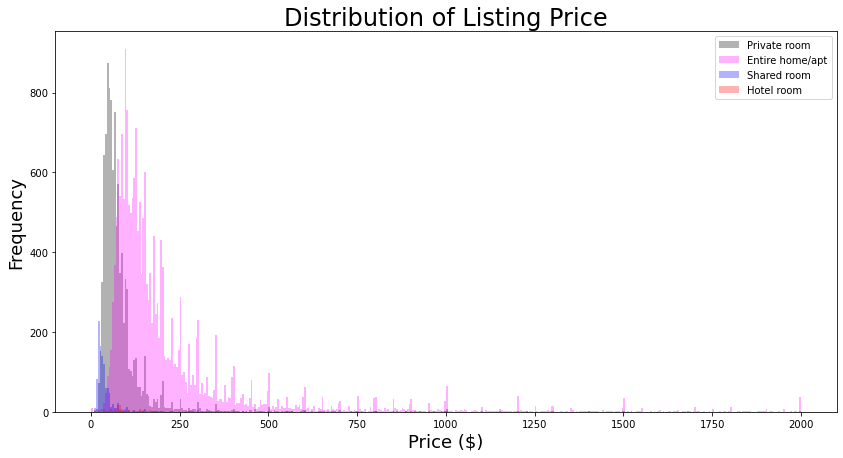

In [150]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

For hotel rooms: 

Text(0, 0.5, 'Frequency')

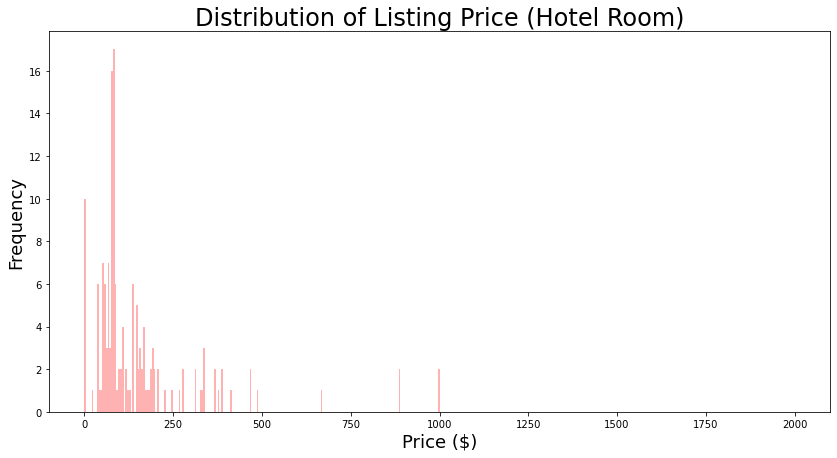

In [151]:
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
plt.title('Distribution of Listing Price (Hotel Room)', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

In [152]:
len(df[df.price<800])
len(df.price)
len(df[df.price<800])/len(df.price)

0.9611237950279046

Price range (0,800) covers 95% of the listing data. 

Plot distribution for range (0,800)

Text(0, 0.5, 'Frequency')

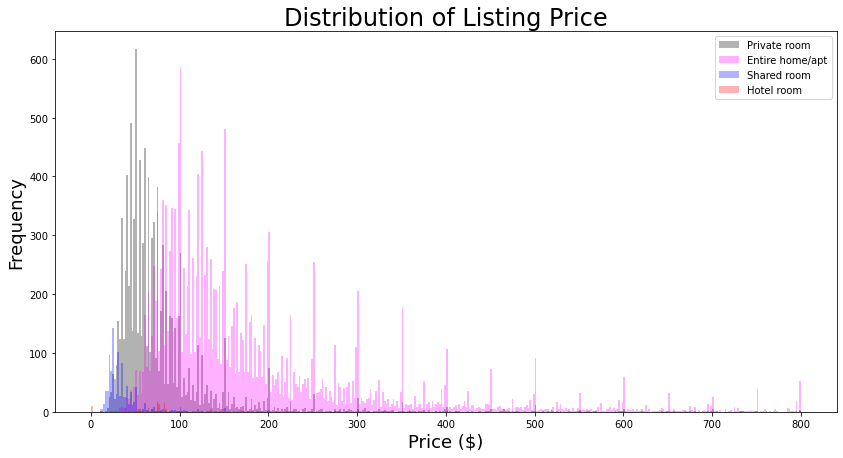

In [153]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)


In [154]:
df1=df[df.price<800]

In [155]:
df_practice = df.copy()
df_practice['name'] = df_practice['name'].str.lower()
df_practice.dropna()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,73072,109,amazing bright elegant condo park front *upgra...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,15/05/16,0.02,1,163,Los Angeles
1,73073,344,family perfect;pool;near studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,176,2,8,19/10/19,0.15,1,0,Los Angeles
2,73074,2708,beautiful furnish mirrored mini-suite w/ firep...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,74,30,26,31/07/20,0.34,2,338,Los Angeles
3,73075,2732,zen life at the beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,27/12/19,0.19,2,360,Los Angeles
5,73077,5728,tiny home in artistic oasis near venice and lax,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,55,30,310,29/04/20,2.28,4,282,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31306,104378,45275583,cozy hollywood suite getaway,301337790,Kamal,City of Los Angeles,Hollywood,34.09431,-118.31019,Entire home/apt,125,1,2,07/09/20,2.00,1,363,Los Angeles
31338,104410,45287156,amazing master bedroom on hollywood,133276825,Alexa,City of Los Angeles,Hollywood,34.09798,-118.34809,Private room,83,1,1,06/09/20,1.00,25,86,Los Angeles
31352,104424,45288821,newly built hostel room f,365617673,Karam,Other Cities,Culver City,34.00486,-118.40819,Private room,59,1,1,08/09/20,1.00,7,357,Los Angeles
31407,104479,45304211,ëá™â∏¶âç´áîüèó¥â•óêàø-áωóâö∞â≤ó‰∏≠âøé- ëøëè´òè...,258073377,Lulu,Unincorporated Areas,Rowland Heights,33.99249,-117.88494,Private room,68,1,1,07/09/20,1.00,10,73,Los Angeles


In [156]:
df_motels = df_practice.loc[df_practice['name'].str.contains('motel',regex=False) == True]
df_hotels = df_practice.loc[df_practice['name'].str.contains('hotel',regex=False) == True]

In [157]:
df_motels.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
58,73130,44511,"motel rm $390 week,wifi,micro/fridg",195697,Andy,Other Cities,Lynwood,33.91942,-118.20913,Private room,54,1,212,11/08/20,1.83,7,166,Los Angeles
61,73133,46699,"motel rm $390 week , free wifi /ac/micro/fridge",195697,Andy,Other Cities,Lynwood,33.91942,-118.20913,Private room,54,1,170,29/07/20,1.62,7,0,Los Angeles
103,73175,84636,"motel rm for rent ,free wifi and parking $390 ...",195697,Andy,Other Cities,Lynwood,33.91942,-118.20913,Private room,54,1,221,18/08/20,1.95,7,171,Los Angeles
115,73187,97000,motel rm 2beds/micro/fridge/ac/wifi,195697,Andy,Other Cities,Lynwood,33.91942,-118.20913,Private room,75,1,77,24/08/20,0.70,7,180,Los Angeles
126,73198,120005,motel rm $390 wk /free wifi and parking,195697,Andy,Other Cities,Lynwood,33.91942,-118.20913,Private room,54,1,55,05/07/20,0.50,7,180,Los Angeles


In [158]:
df_hotels.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
16,73088,11374,budget hotel in los angeles,42220,Searockinn,Other Cities,Gardena,33.90348,-118.29269,Private room,81,1,32,05/07/20,0.28,4,365,Los Angeles
464,73536,609376,hollywood sign casa * hotel suite & garden apt.,3021177,Carlos,City of Los Angeles,Hollywood Hills,34.13030,-118.33916,Entire home/apt,123,30,584,23/03/20,5.94,1,39,Los Angeles
698,73770,907295,hollywood mini boutique hotel,4859326,Coco,City of Los Angeles,Hollywood Hills,34.10766,-118.32012,Private room,170,30,3,08/10/17,0.08,1,89,Los Angeles
1260,74332,1850001,great hotel alternative,9662298,Joel,City of Los Angeles,Beverly Grove,34.06628,-118.36913,Entire home/apt,233,31,15,20/01/19,0.18,1,179,Los Angeles
1857,74929,3280390,cozy sunny 1.5br with park and famous hotel view,16507133,Wil,Other Cities,Beverly Hills,34.06622,-118.39734,Entire home/apt,130,2,12,27/08/17,0.16,3,72,Los Angeles


In [159]:
df_practice.loc[df_practice['name'].str.contains('motel',regex=False) == True, 'room_type'] = 'Hotel room'

In [160]:
df_practice.loc[df_practice['name'].str.contains('hotel',regex=False) == True, 'room_type'] = 'Hotel room'

In [161]:
df_practice.loc[df_practice['name'].str.contains('hotel',regex=False) == True].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
16,73088,11374,budget hotel in los angeles,42220,Searockinn,Other Cities,Gardena,33.90348,-118.29269,Hotel room,81,1,32,05/07/20,0.28,4,365,Los Angeles
464,73536,609376,hollywood sign casa * hotel suite & garden apt.,3021177,Carlos,City of Los Angeles,Hollywood Hills,34.13030,-118.33916,Hotel room,123,30,584,23/03/20,5.94,1,39,Los Angeles
698,73770,907295,hollywood mini boutique hotel,4859326,Coco,City of Los Angeles,Hollywood Hills,34.10766,-118.32012,Hotel room,170,30,3,08/10/17,0.08,1,89,Los Angeles
1260,74332,1850001,great hotel alternative,9662298,Joel,City of Los Angeles,Beverly Grove,34.06628,-118.36913,Hotel room,233,31,15,20/01/19,0.18,1,179,Los Angeles
1857,74929,3280390,cozy sunny 1.5br with park and famous hotel view,16507133,Wil,Other Cities,Beverly Hills,34.06622,-118.39734,Hotel room,130,2,12,27/08/17,0.16,3,72,Los Angeles


In [162]:
print(df['room_type'].value_counts())

Entire home/apt    20261
Private room       10046
Shared room         1072
Hotel room           157
Name: room_type, dtype: int64


In [163]:
print(df_practice['room_type'].value_counts())

Entire home/apt    20220
Private room        9910
Shared room         1070
Hotel room           336
Name: room_type, dtype: int64


Text(0, 0.5, 'Frequency')

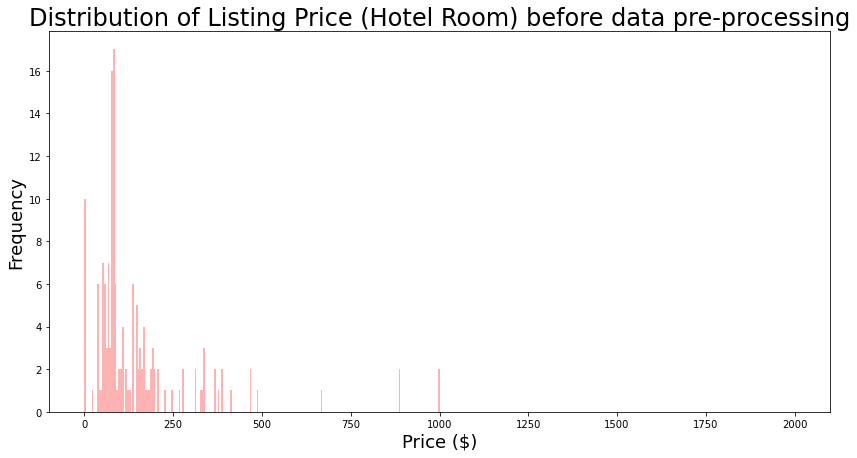

In [164]:
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
plt.title('Distribution of Listing Price (Hotel Room) before data pre-processing', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

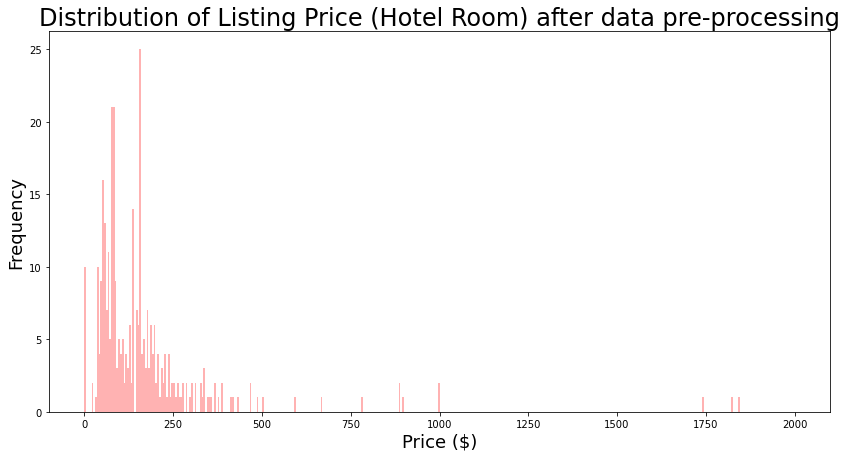

In [165]:
df_practice[df_practice['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
plt.title('Distribution of Listing Price (Hotel Room) after data pre-processing', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)